<a href="https://colab.research.google.com/github/benasphy/DBSCAN/blob/main/Customer%20Segmentation%20DBSCAN%20VS%20HDBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


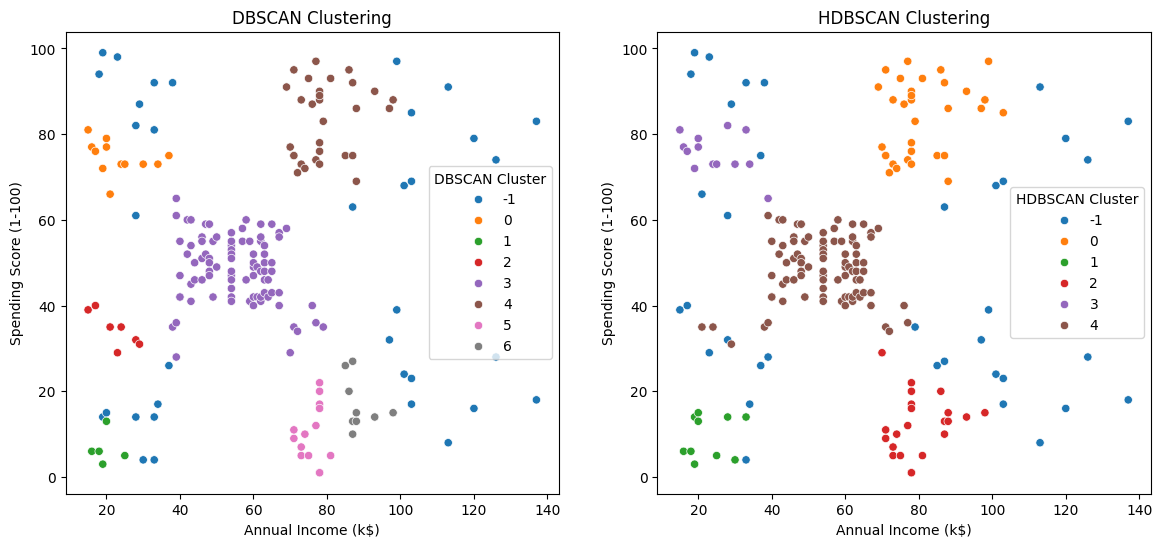

DBSCAN found 7 clusters
HDBSCAN found 5 clusters


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import hdbscan

# Load dataset
url = "/content/customers.csv"
df = pd.read_csv(url)

# Selecting relevant features: Annual Income and Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN Cluster'] = dbscan_labels

# Apply HDBSCAN
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
hdbscan_labels = hdbscan_model.fit_predict(X_scaled)

df['HDBSCAN Cluster'] = hdbscan_labels

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# DBSCAN Plot
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['DBSCAN Cluster'], palette='tab10', ax=axes[0])
axes[0].set_title('DBSCAN Clustering')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')

# HDBSCAN Plot
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['HDBSCAN Cluster'], palette='tab10', ax=axes[1])
axes[1].set_title('HDBSCAN Clustering')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')

plt.show()

# Compare number of clusters
print(f"DBSCAN found {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)} clusters")
print(f"HDBSCAN found {len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)} clusters")


In [2]:
!pip install hdbscan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 41.8 MB/s eta 0:00:00
